<a href="https://colab.research.google.com/github/laakshit-D/Mini-Project/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [19]:
data_dir = '/content/drive/MyDrive/Bricks-Under-Construction-Building-Houses'

In [20]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='binary', subset='training')
val_gen = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='binary', subset='validation')

Found 311 images belonging to 1 classes.
Found 77 images belonging to 1 classes.


In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.9567 - loss: 0.1785 - val_accuracy: 1.0000 - val_loss: 4.7374e-21
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 1.0000 - loss: 6.3447e-16 - val_accuracy: 1.0000 - val_loss: 6.1370e-31
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 1.0000 - loss: 1.0644e-18 - val_accuracy: 1.0000 - val_loss: 1.9359e-35
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 1.0000 - loss: 2.1700e-25 - val_accuracy: 1.0000 - val_loss: 2.5135e-37
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 1.0000 - loss: 3.0162e-25 - val_accuracy: 1.0000 - val_loss: 4.4311e-38
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 1.0000 - loss: 3.5511e-16 - val_accuracy: 1.0000 - val_loss: 2.2596e-38
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 1.0000 - loss: 1.8246e-28 - val_accuracy: 1.0000 - val_loss: 1.7485e-38
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 1.00

In [24]:
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 7.5587e-39
Validation Accuracy: 100.00%


In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Bricks Under Construction Building or Houses ! Free Data Set (43).jpg to Bricks Under Construction Building or Houses ! Free Data Set (43).jpg


In [27]:
img_path = list(uploaded.keys())[0]  # Get the uploaded file name
img = image.load_img(img_path, target_size=(128, 128))  # Resize image
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)

In [30]:
prediction = model.predict(img_array)
predicted_class = "Damaged" if prediction[0][0] < 0.5 else "Undamaged"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


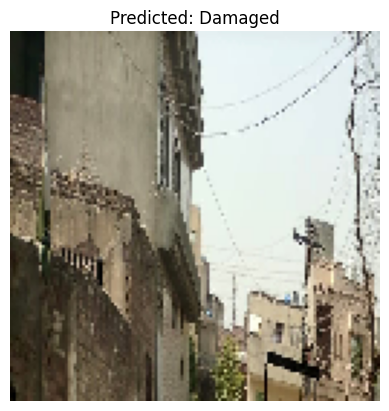

In [31]:
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()